# Discovery of interesting objects in large spectra survey using active deep learning


## TODO list

1. at the end check text with grammarly
1. fill in the Introduction

## Introduction

TODO complete introduction

This letter is organized as follows. Section Data desribes the LAMOST and Ondřejov 2m Perek telescope data sources. Next, section Preprocessing introduces all methods employed to prepare data for learning. Main section is Method section, where our active convolutional neural network is detailed. Finally, in Result section the outcomes of our experiment are discussed.

In [1]:
from active_cnn import data, plot

import matplotlib.pyplot as plt
import numpy as np

# setup matplotlib: https://matplotlib.org/users/usetex.html
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Data

Our work is about discovery of interesting objects in LAMOST spectral survey using data from Ondřejov 2m Perek telescope, so this section introduces the to spectrographs and gives information about the spectral data it produced.

### LAMOST spectral survey

In [2]:
# number of spectra in LAMOST DR2
!wc -l data/lamost-dr2.lst

4136482 data/lamost-dr2.lst


The LAMOST telescope is delivering one of currently largest collections of spectra.
Its publicly accessible data release 2 (DR2) contains slightly more than 4 milion spectra with a spectral resolving power around 1800 covering the range 3690-9100 Angstroms.
The LAMOST pipeline assigns spectra automatically an estimated spectral class.
However, the classification is mostly based on global shape and integral properties of a spectrum in given band-passes using a set of predefined templates.
The local features, as for example detailed line profile, are ignored.
Therefore, strong narrow emissions may be rejected by the pipeline as spoiled pixels.
The archive FITS files have their spectral axis experessed in logarithm of vacuum wavelength.

### Archive of Ondřejov 2m Perek telescope

A unique source of the spectra with emission-line stars (mostly Be and B[e] hot stars with strong winds and several novae) is the archive of spectra obtained with 700 mm camera in the coude spectrograph of the 2m Perek telescope at Ondřejov observatory a part of the Astronomical Institute of the Czech Academy of Sciences.
This continuously growing archive (hereafter CCD700) contains currently about 17000 spectra, the majority of them (more than 13000) are exposed in spectral range 6250-6700 Angstrom with spectral resolving power about 13000.
The spectra are reduced by standard IRAF procedures including the calibration in air wavelengths and heliocentric correction.

From CCD700 archive there is a dataset (hereafter Ondřejov dataset, https://github.com/podondra/ondrejov-dataset) created by Podsztavek (2017).
The dataset contains 12936 labeled spectra, which are divided into 3 classes according to the profile of H-alpha spectral line:

- absorption: 6102 spectra (47.17%),
- emission: 5301 spectra (40.98%) and
- double-peak: 1533 spectra (11.85%).

Text(0.5,6.8,'wavelength (\\AA)')

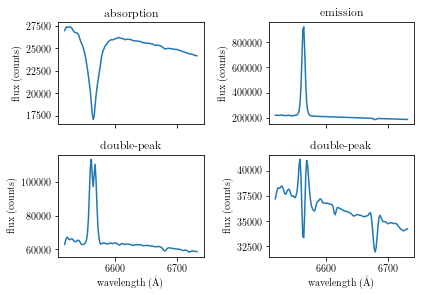

In [3]:
ondrejov = data.get_ondrejov_dataset('data/ondrejov-dataset.csv')

# preview of the Ondrejov dataset
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
labels = ['absorption', 'emission'] + 2 * ['double-peak']
spectra_id = ['a201403300026', 'lb160035', 'si220021', 'a201306110029']
for spectrum_id, label, ax in zip(spectra_id, labels, axs.flat):
    ax.set_title(label)
    ax.set_ylabel('flux (counts)')
    plot.plot_ondrejov_spectrum(spectrum_id, ondrejov, ax)
fig.tight_layout()
plt.savefig('figures/profiles.pdf')
axs[1][0].set_xlabel('wavelength (\AA)')
axs[1][1].set_xlabel('wavelength (\AA)')